In [2]:
import pandas as pd
from scipy.stats import ttest_ind

# Load the data
data = pd.read_csv('End_dataframe.csv')

# Group by Participant_ID and aggregate data
aggregated_data = data.groupby('ID').agg({
    'Gender': 'first',  
    'Age': 'first',     
    'VVR_Encoded': 'max'  
}).reset_index()

# Separate groups based on aggregated vasovagal reactions (0 = low, 1 = high)
low_vvr_group = aggregated_data[aggregated_data['VVR_Encoded'] == 0]
high_vvr_group = aggregated_data[aggregated_data['VVR_Encoded'] == 1]

# Separate gender groups
male_group = aggregated_data[aggregated_data['Gender'] == 1]
female_group = aggregated_data[aggregated_data['Gender'] == 2]

# Perform t-test for Gender (Male/Female)
ttest_male = ttest_ind(
    male_group[male_group['VVR_Encoded'] == 0]['Age'],
    male_group[male_group['VVR_Encoded'] == 1]['Age'],
    equal_var=False  # Use Welch's t-test if variance is unequal
)
ttest_female = ttest_ind(
    female_group[female_group['VVR_Encoded'] == 0]['Age'],
    female_group[female_group['VVR_Encoded'] == 1]['Age'],
    equal_var=False
)

# Perform t-test for Age (Low VVR vs. High VVR)
ttest_age = ttest_ind(
    low_vvr_group['Age'],
    high_vvr_group['Age'],
    equal_var=False
)

# Print the t-test results
print('T-Test for Gender (Male) - Low VVR vs. High VVR:')
print("T-Statistic:", ttest_male.statistic)

print('\nT-Test for Gender (Female) - Low VVR vs. High VVR:')
print('T-Statistic:', ttest_female.statistic)

print('\nT-Test for Age - Low VVR vs. High VVR:')
print('T-Statistic:', ttest_age.statistic)


T-Test for Gender (Male) - Low VVR vs. High VVR:
T-Statistic: 2.023768651135634

T-Test for Gender (Female) - Low VVR vs. High VVR:
T-Statistic: 1.1488082011486989

T-Test for Age - Low VVR vs. High VVR:
T-Statistic: 2.0090514532447483


In [3]:
import pandas as pd
from scipy import stats

# Read the data from CSV file
data = pd.read_csv('End_dataframe.csv')

# Group by Participant_ID to ensure unique participants
aggregated_data = data.groupby('ID').agg({
    'Prior_Donation': 'first',  
    'VVR_Encoded': 'max'       
}).reset_index()

# Separate data for low VVR and high VVR groups based on 'Prior_Donation'
low_vvr_data = aggregated_data[aggregated_data['Prior_Donation'] == 1]['VVR_Encoded']
high_vvr_data = aggregated_data[aggregated_data['Prior_Donation'] == 2]['VVR_Encoded']

# Calculate standard deviation for low VVR and high VVR
low_vvr_sd = low_vvr_data.std()
high_vvr_sd = high_vvr_data.std()

# Perform t-test for independent samples
t_statistic, p_value = stats.ttest_ind(low_vvr_data, high_vvr_data, equal_var=False)  # Welch's t-test

# Print the results
print('Standard Deviation (Low VVR):', low_vvr_sd)
print('Standard Deviation (High VVR):', high_vvr_sd)
print('T-Statistic:', t_statistic)


Standard Deviation (Low VVR): 0.3275031320440732
Standard Deviation (High VVR): 0.5017567482042767
T-Statistic: -4.814929202261541


In [4]:
import pandas as pd

# Load the data
data = pd.read_csv("End_dataframe.csv")

# Group by Participant_ID and aggregate Gender and VVR_Encoded
unique_participants = data.groupby("ID").agg({
    "Gender": "first",  
    "VVR_Encoded": "max"  
}).reset_index()

# Compute counts
male_low_vvr_count = len(unique_participants[(unique_participants["Gender"] == 1) & (unique_participants["VVR_Encoded"] == 0)])
male_high_vvr_count = len(unique_participants[(unique_participants["Gender"] == 1) & (unique_participants["VVR_Encoded"] == 1)])

print("Count for Male (1) with Low VVR (0):", male_low_vvr_count)
print("Count for Male (1) with High VVR (1):", male_high_vvr_count)


Count for Male (1) with Low VVR (0): 103
Count for Male (1) with High VVR (1): 29


In [5]:
!pip install --upgrade numexpr

import pandas as pd

# Read the data
data = pd.read_csv("End_dataframe.csv")

# Group by Participant_ID and aggregate Gender and VVR_Encoded
aggregated_data = data.groupby("ID").agg({
    "Gender": "first",  
    "VVR_Encoded": "max"  
}).reset_index()

# Compute counts for unique participants
female_low_vvr_count = len(aggregated_data[(aggregated_data["Gender"] == 2) & (aggregated_data["VVR_Encoded"] == 0)])
female_high_vvr_count = len(aggregated_data[(aggregated_data["Gender"] == 2) & (aggregated_data["VVR_Encoded"] == 1)])

# Print the results
print("Count for Female (2) with Low VVR (0):", female_low_vvr_count)
print("Count for Female (2) with High VVR (1):", female_high_vvr_count)


  Using cached numexpr-2.10.2-cp310-cp310-manylinux_2_27_x86_64.manylinux_2_28_x86_64.whl.metadata (8.1 kB)
Using cached numexpr-2.10.2-cp310-cp310-manylinux_2_27_x86_64.manylinux_2_28_x86_64.whl (397 kB)
  Attempting uninstall: numexpr
    Found existing installation: numexpr 2.7.3
    Uninstalling numexpr-2.7.3:
      Successfully uninstalled numexpr-2.7.3
Count for Female (2) with Low VVR (0): 126
Count for Female (2) with High VVR (1): 64


In [6]:
import numpy as np
Age_low_vvr_mean = np.mean(data[data["VVR_Encoded"] == 0]["Age"])
Age_low_vvr_std = np.std(data[data["VVR_Encoded"] == 0]["Age"])

Age_high_vvr_mean = np.mean(data[data["VVR_Encoded"] == 1]["Age"])
Age_high_vvr_std = np.std(data[data["VVR_Encoded"] == 1]["Age"])

print("Mean (M) of Age for Low VVR (0):", Age_low_vvr_mean)
print("Standard Deviation (SD) of Age for Low VVR (0):", Age_low_vvr_std)
print("Mean (M) of Age for High VVR (1):", Age_high_vvr_mean)
print("Standard Deviation (SD) of Age for High VVR (1):", Age_high_vvr_std)

Mean (M) of Age for Low VVR (0): 37.12719298245614
Standard Deviation (SD) of Age for Low VVR (0): 13.597166791366186
Mean (M) of Age for High VVR (1): 33.83870967741935
Standard Deviation (SD) of Age for High VVR (1): 13.384544386814012


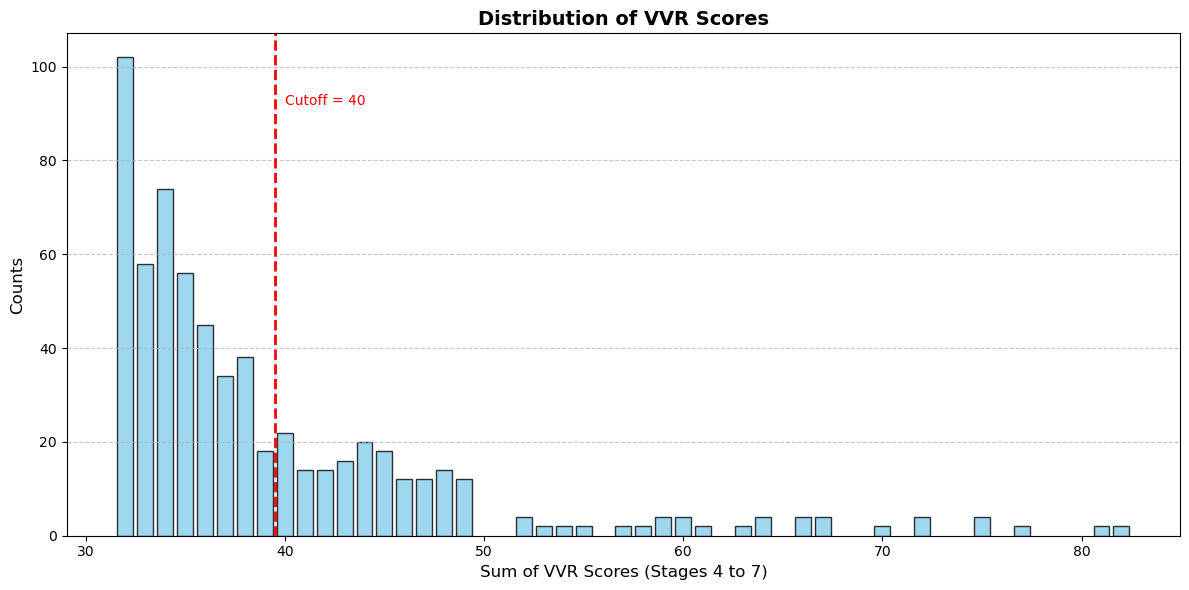

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Filter out VVR scores less than 32
filtered_vasovagal = data["VVR_sum"][data["VVR_sum"] >= 32]

# Calculate the counts for each VVR score
score_counts = filtered_vasovagal.value_counts().sort_index()

# Create the bar graph with improved styling
plt.figure(figsize=(12, 6))  # Adjust the figure size
plt.bar(score_counts.index, score_counts.values, align='center', color='skyblue', edgecolor='black', alpha=0.8)
plt.xlabel("Sum of VVR Scores (Stages 4 to 7)", fontsize=12)
plt.ylabel("Counts", fontsize=12)
plt.title("Distribution of VVR Scores", fontsize=14, fontweight='bold')

# Add a vertical line at the cutoff with annotation
cutoff = 40
plt.axvline(x=cutoff - 0.5, color='red', linestyle='--', linewidth=2)
plt.text(cutoff, max(score_counts.values) * 0.9, 'Cutoff = 40', color='red', fontsize=10, rotation=0)

# Customize the grid and ticks
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.yticks(fontsize=10)

# Save the graph to a PDF
plt.tight_layout()  # Ensures everything fits within the figure
plt.savefig("VVR_Score_Distribution.pdf", bbox_inches='tight')

# Display the graph
plt.show()



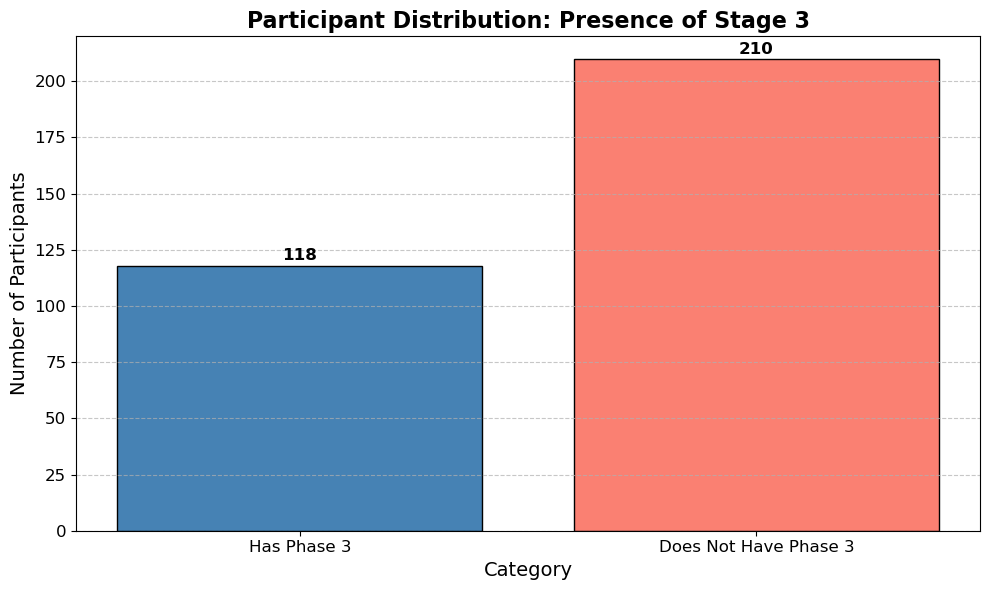

'participant_phase_distribution.pdf'

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file
file_path = 'processed_videos_eind.csv'
df = pd.read_csv(file_path)

# Ensure Phase and ID columns exist
if 'Phase' not in df.columns or 'ID' not in df.columns:
    raise ValueError("The CSV file must contain 'Phase' and 'ID' columns.")

# Filter participants with "Phase 3"
participants_with_phase_3 = df[df['Phase'] == "Phase 3"]['ID'].unique()

# Total unique participants
total_participants = df['ID'].unique()

# Calculate counts
has_phase_3 = len(participants_with_phase_3)
no_phase_3 = len(total_participants) - has_phase_3

# Create a DataFrame for visualization
ratio_df = pd.DataFrame({
    'Category': ['Has Phase 3', 'Does Not Have Phase 3'],
    'Count': [has_phase_3, no_phase_3]
})

# Create a bar plot
plt.figure(figsize=(10, 6))
bars = plt.bar(
    ratio_df['Category'],
    ratio_df['Count'],
    color=['steelblue', 'salmon'],
    edgecolor='black'
)

# Add the numbers above each bar
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,  # X coordinate
        height + 1,  # Y coordinate slightly above the bar
        f'{int(height)}',  # Text
        ha='center',  # Horizontal alignment
        va='bottom',  # Vertical alignment
        fontsize=12,
        fontweight='bold'
    )

# Add plot details
plt.title('Participant Distribution: Presence of Stage 3', fontsize=16, fontweight='bold')
plt.xlabel('Category', fontsize=14)
plt.ylabel('Number of Participants', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.ylim(0, max(ratio_df['Count']) + 10)  # Add some extra space above bars
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Save the plot
output_plot_path = 'participant_phase_distribution.pdf'
plt.savefig(output_plot_path, format='pdf')
plt.show()

# Provide the saved plot path
output_plot_path



Missing Values in Each Column:
ID       0
Phase    0
HRV      0
dtype: int64

Rows with Negative HRV Values (if any):
Empty DataFrame
Columns: [ID, Phase, HRV]
Index: []

Descriptive Statistics for HRV:
count    656.000000
mean       1.731408
std        0.354269
min        1.033395
25%        1.519701
50%        1.644326
75%        1.838590
max        3.540932
Name: HRV, dtype: float64


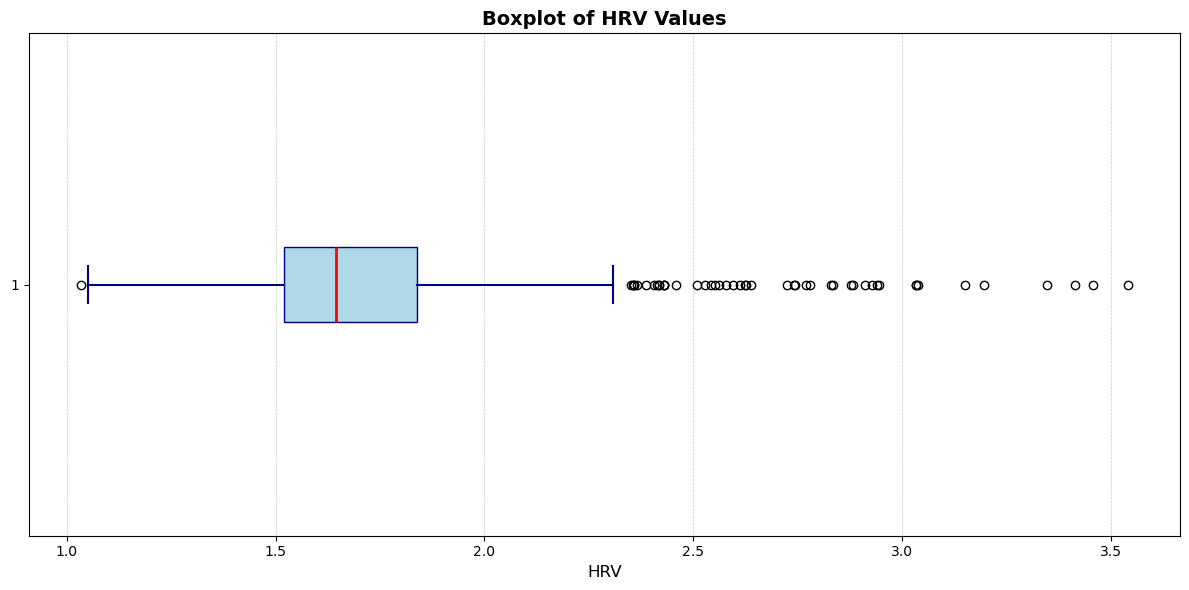

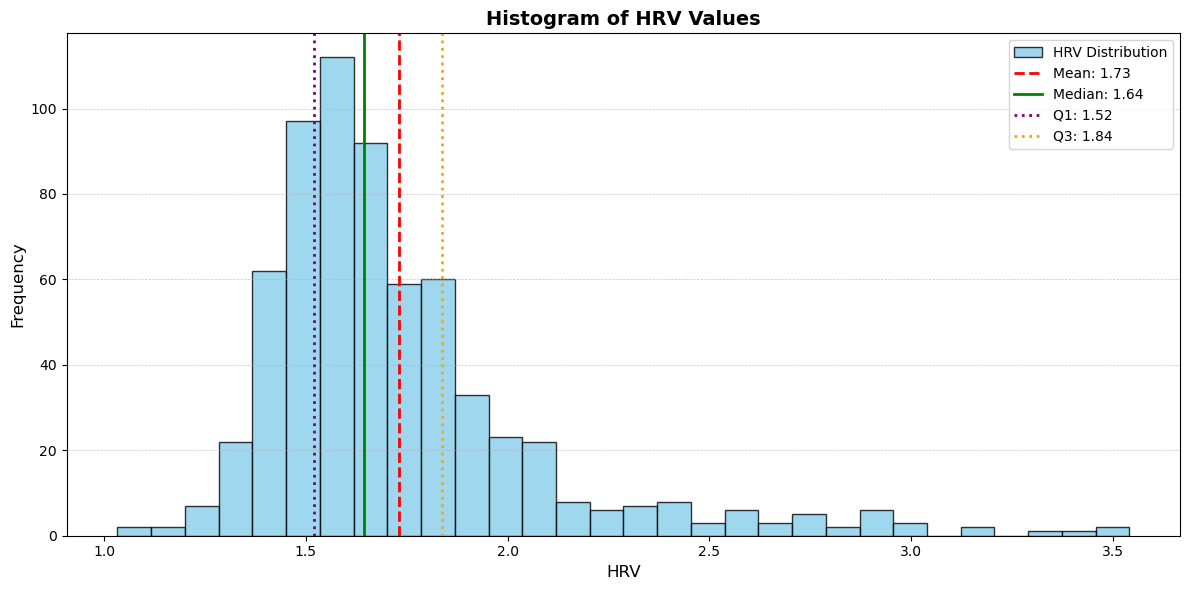

In [22]:
import matplotlib.pyplot as plt
import pandas as pd

# Load the dataset
file_path = 'processed_videos_eind.csv'
data = pd.read_csv(file_path)

# Drop rows where Phase is Phase 3
data = data[data['Phase'] != 'Phase 3']

# Check for missing values in the dataset
missing_values = data.isnull().sum()
print("\nMissing Values in Each Column:")
print(missing_values)

# Check for negative HRV values (if considered unusual)
negative_values = data[data['HRV'] < 0]
print("\nRows with Negative HRV Values (if any):")
print(negative_values)

# Descriptive statistics to detect extreme values (outliers)
hrv_stats = data['HRV'].describe()
print("\nDescriptive Statistics for HRV:")
print(hrv_stats)

# Boxplot of HRV values
plt.figure(figsize=(12, 6))
plt.boxplot(data['HRV'], vert=False, patch_artist=True,
            boxprops=dict(facecolor='lightblue', color='darkblue'),
            medianprops=dict(color='red', linewidth=2),
            whiskerprops=dict(color='darkblue', linewidth=1.5),
            capprops=dict(color='darkblue', linewidth=1.5))
plt.title("Boxplot of HRV Values", fontsize=14, fontweight='bold')
plt.xlabel("HRV", fontsize=12)
plt.grid(axis='x', linestyle='--', linewidth=0.5, alpha=0.7)
plt.tight_layout()
plt.savefig("HRV_Boxplot.pdf")  # Save the boxplot to PDF
plt.show()

# Descriptive statistics for HRV
mean_hrv = hrv_stats['mean']
median_hrv = hrv_stats['50%']
q1_hrv = hrv_stats['25%']
q3_hrv = hrv_stats['75%']

# Histogram of HRV values with descriptive statistics
plt.figure(figsize=(12, 6))
plt.hist(data['HRV'], bins=30, edgecolor='black', alpha=0.8, color='skyblue', label='HRV Distribution')

# Add vertical lines for descriptive statistics
plt.axvline(mean_hrv, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_hrv:.2f}')
plt.axvline(median_hrv, color='green', linestyle='-', linewidth=2, label=f'Median: {median_hrv:.2f}')
plt.axvline(q1_hrv, color='purple', linestyle=':', linewidth=2, label=f'Q1: {q1_hrv:.2f}')
plt.axvline(q3_hrv, color='orange', linestyle=':', linewidth=2, label=f'Q3: {q3_hrv:.2f}')

# Add title, labels, and legend
plt.title("Histogram of HRV Values", fontsize=14, fontweight='bold')
plt.xlabel("HRV", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.grid(axis='y', linestyle='--', linewidth=0.5, alpha=0.7)
plt.legend(fontsize=10)
plt.tight_layout()
plt.savefig("HRV_Histogram.pdf")  # Save the histogram to PDF
plt.show()


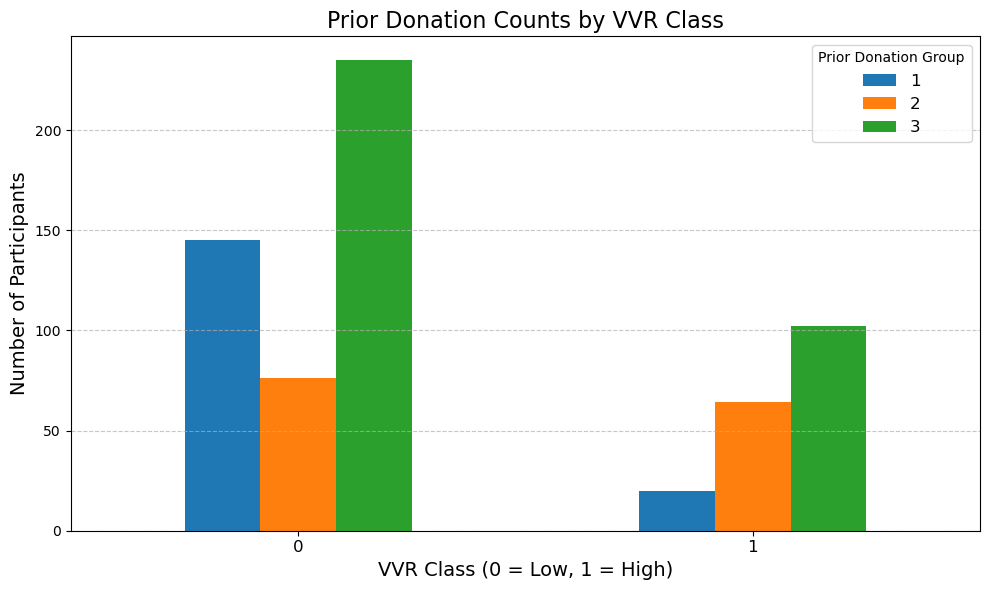

In [3]:
# Adjusted code to load the dataframe and ensure proper visualization preparation

import pandas as pd
import matplotlib.pyplot as plt

# Load the End_dataframe.csv file
file_path = 'End_dataframe.csv'
end_dataframe = pd.read_csv(file_path)

# Verify if required columns exist for analysis
required_columns = ['VVR_Encoded', 'Prior_Donation']
if not all(col in end_dataframe.columns for col in required_columns):
    raise ValueError(f"The dataframe must contain the following columns: {required_columns}")

# Calculate the count of participants in each Prior Donation group per VVR group
prior_donation_counts = end_dataframe.groupby(['VVR_Encoded', 'Prior_Donation']).size().unstack()

# Visualize the Prior Donation Counts by VVR Group as a bar graph
prior_donation_counts.plot(kind='bar', figsize=(10, 6))

# Add labels and title to the bar graph
plt.title('Prior Donation Counts by VVR Class', fontsize=16)
plt.xlabel('VVR Class (0 = Low, 1 = High)', fontsize=14)
plt.ylabel('Number of Participants', fontsize=14)
plt.xticks(rotation=0, fontsize=12)
plt.legend(title='Prior Donation Group', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.savefig("Prior_Donation_by_VVR_group.pdf")
plt.show()
